In [1]:
%%html  
<style>.cm-s-ipython .CodeMirror-matchingbracket { color: black !important;}</style><!-- Bob J: no green highlights -->
<style>table.dataframe th { vertical-align: top; }</style><!-- Move MultiIndex headers to top of block -->
<style>table.dataframe td, table.dataframe th { border-style: solid; border-width: thin; }</style><!-- thin border around tables -->

In [2]:
%%javascript  # Prefer to display output instead of scrolling, so it can print
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Standard definitions and options
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
# widen the page to match the window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# full width display of tables
pd.options.display.max_columns = 50
# want to display all rows
pd.options.display.max_rows = None

In [4]:
import json
# read log in JSON form, as processed by i.e. transfer.php
with open('log.json', 'r') as f:
    samples_dict = json.load(f)

In [5]:
exerciseName = {
    "exercise1.tar":       " 1 Testing 1",
    "exercise2.tar":       " 2 Testing 2 JUnit",
    "exerciseD.tar":       " 3 Testing 3 CppUnit",
    "exerciseP.tar":       " 4 Testing 3 PyUnit",
    "exercise3.tar":       " 5 Profiling 1",
    "exercise4.tar":       " 6 Profiling 2",
    "exercise5.tar":       " 7 Memory",
    "exerciseC.tar":       " 8 SVN",
    "exG2script.sh":       " 9 Git 2",
    "exG3script.sh":       "10 Git 3",
    "exG3MasterRepo.tar":  "10 Git 3",
    "exerciseM1.tar":      "11 CMake 1",
    "exerciseM1A.tar":     "11 CMake 1",
    "exerciseM2.tar":      "12 CMake 2",
    "exerciseM2A.tar":     "12 CMake 2",
    "exerciseM2B.tar":     "12 CMake 2",
    "exercise7.tar":       "13 CMT 1",
    "exercise7extras.tar": "13 CMT 1",
    "exercise8.tar":       "14 CMT 2",
    "exercise9.tar":       "15 CMT 3",
    "exerciseF.tar":       "16 Dist Git",
    "cmt-dev-all.tgz":     "17 CMT Build"
}


In [6]:
df = DataFrame()
for sample in samples_dict : 
        df = df.append(sample, ignore_index=True)
df = df.replace(np.nan, '', regex=True)

# Add column
def lookUpCanFail(array, item, failValue) :
    try :
        return array[item]
    except:
        return failValue

df['Exercise'] = df.apply(lambda row: \
                    lookUpCanFail(exerciseName, row.file, ""), axis = 1)

In [7]:
display(df[df.user=="csc_armenuhi"])

,DATE,IP,REMOTE_HOST,host,item1,item2,item3,item4,user,file,Exercise
281,2019-09-17 07:41:16,193.231.20.94,,CSC2019,setup,,,,csc_armenuhi,,
284,2019-09-17 07:42:08,193.231.20.94,,CSC2019,team,Armine Abramyan,Jubna Irakkathil Jabbar,,csc_armenuhi,,
340,2019-09-17 08:10:28,193.231.20.94,,CSC2019,,,,,csc_armenuhi,exerciseP.tar,4 Testing 3 PyUnit
342,2019-09-17 08:10:57,193.231.20.94,,CSC2019,,,,,csc_armenuhi,exerciseP.tar,4 Testing 3 PyUnit
344,2019-09-17 08:11:12,193.231.20.94,,CSC2019,,,,,csc_armenuhi,./exerciseP.tar,
349,2019-09-17 08:13:14,193.231.20.94,,CSC2019,,,,,csc_armenuhi,exerciseP.tar,4 Testing 3 PyUnit
378,2019-09-17 08:29:49,193.231.20.94,,CSC2019,,,,,csc_armenuhi,exercise1.tar,1 Testing 1
385,2019-09-17 08:33:39,193.231.20.94,,CSC2019,,,,,csc_armenuhi,exercise5.tar,7 Memory


In [8]:
# show counts of IP addresses
display(df.groupby("IP").count()["REMOTE_HOST"])

IP
157.131.108.177      2
157.193.98.99       17
193.231.20.94      597
212.95.5.108         5
80.12.39.167         7
82.78.32.255         8
Name: REMOTE_HOST, dtype: int64

In [9]:
# self-reported host names
display(df.host.unique())

array(['CSC2019', 'BobJacosensMBP2', 'Bob-Jacobsens-MBP-2.local',
       'inst-3a-138', 'Joshs-MacBook-Air.local', '',
       '<script>alert("hello")</script>'], dtype=object)

In [10]:
display(df.user.unique())

array(['csc_student', 'jake', 'csc_willem', 'csc_ciprian', 'csc_de',
       'csc_maciej', 'csc_chloe', 'csc_andrew', 'csc_cosmingabriel',
       'csc_felix', 'csc_robbie', 'csc_brendan', 'csc_enrico', 'csc_sam',
       'csc_daniel', 'csc_hevjin', 'csc_matteo', 'csc_devin',
       'csc_cedric', 'csc_danielj', 'csc_pablo', 'csc_fabian', 'csc_emil',
       'csc_cornelis', 'csc_miguel', 'csc_janik', 'anovak', 'csc_asier',
       'csc_toby', 'csc_kimmo', 'csc_ioannis', 'csc_stefano', 'csc_artem',
       'csc_saad', 'csc_diogo', 'csc_oliver', 'csc_narine',
       'csc_sebastiant', 'csc_sorin', 'csc_lukas', 'csc_carlos',
       'csc_surya', 'csc_kilian', 'csc_carlosp', 'joshfenech', 'csc_rita',
       'csc_triet', 'csc_lukasg', 'csc_yuval', 'csc_vladimir',
       'csc_ruchi', 'csc_javad', 'csc_sharad', 'csc_stefanie',
       'csc_michael', 'csc_andrzej', 'csc_pedro', 'csc_david', 'csc_petr',
       'csc_caio', 'csc_jubna', 'csc_michele', 'csc_armenuhi',
       'csc_yunsheng', 'csc_julien', 'c

In [11]:
# most recent 'setup' time
t1 = df[df.item1 == 'setup']
# display(t1.user.unique())
t1.drop_duplicates(['user'], keep='last')[["DATE", "IP", "host", "user"]]

,DATE,IP,host,user
19,2019-09-14 17:36:58,82.78.32.255,Bob-Jacobsens-MBP-2.local,jake
21,2019-09-16 19:35:25,82.78.32.255,CSC2019,csc_ciprian
24,2019-09-16 21:07:54,82.78.32.255,CSC2019,csc_de
28,2019-09-17 05:55:16,193.231.20.94,CSC2019,csc_chloe
31,2019-09-17 05:55:49,193.231.20.94,CSC2019,csc_cosmingabriel
32,2019-09-17 05:55:55,193.231.20.94,CSC2019,csc_felix
33,2019-09-17 05:56:01,193.231.20.94,CSC2019,csc_robbie
36,2019-09-17 05:57:22,193.231.20.94,CSC2019,csc_enrico
38,2019-09-17 05:58:30,193.231.20.94,CSC2019,csc_sam
41,2019-09-17 05:58:43,193.231.20.94,CSC2019,csc_hevjin


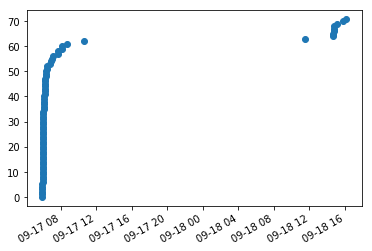

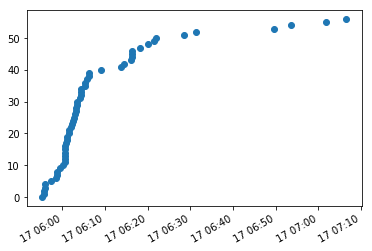

In [12]:
# plot that start up time
t1 = df[df.item1 == 'setup']

# restrict to exercise period 
t1 = t1[t1.DATE > "2019-09-17 04:00:00"]

times = pd.to_datetime(t1["DATE"])
count = np.arange(0, len(times))
plt.plot_date(times, count)
plt.gcf().autofmt_xdate()
plt.show()

# and focus on first exercise period to see startup
t1 = t1[t1.DATE < "2019-09-17 07:30:00"]

times = pd.to_datetime(t1["DATE"])
count = np.arange(0, len(times))
plt.plot_date(times, count)
plt.gcf().autofmt_xdate()
plt.show()



In [13]:
# most recent 'Exercise' by user
t1 = df[df.Exercise.notnull()]
t2 = t1.drop_duplicates(['user'], keep='last').sort_values(['user'])
t2[['DATE','user','Exercise']]

,DATE,user,Exercise
605,2019-09-18 16:16:24,,
617,2019-09-18 16:22:45,$,
607,2019-09-18 16:17:57,"<script>alert(""hello"")</script>",
168,2019-09-17 06:31:26,anovak,1 Testing 1
508,2019-09-18 15:22:19,csc_andrew,5 Profiling 1
571,2019-09-18 15:54:50,csc_andrzej,9 Git 2
385,2019-09-17 08:33:39,csc_armenuhi,7 Memory
622,2019-09-18 16:27:49,csc_artem,9 Git 2
394,2019-09-17 08:45:19,csc_asier,12 CMake 2
606,2019-09-18 16:16:27,csc_brendan,12 CMake 2


In [14]:
# count most recent by Exercise
t1 = df[df.file.notnull()]
t2 = t1.drop_duplicates(['user'], keep='last')
t2.sort_values("Exercise")
t2.groupby("Exercise").count()

,DATE,IP,REMOTE_HOST,host,item1,item2,item3,item4,user,file
Exercise,,,,,,,,,,
,20,20,20,20,20,20,20,20,20,20
1 Testing 1,1,1,1,1,1,1,1,1,1,1
5 Profiling 1,1,1,1,1,1,1,1,1,1,1
6 Profiling 2,1,1,1,1,1,1,1,1,1,1
7 Memory,8,8,8,8,8,8,8,8,8,8
9 Git 2,12,12,12,12,12,12,12,12,12,12
10 Git 3,13,13,13,13,13,13,13,13,13,13
11 CMake 1,6,6,6,6,6,6,6,6,6,6
12 CMake 2,10,10,10,10,10,10,10,10,10,10


In [15]:
# how many total times for each Exercise
t1 = df[df.Exercise.notnull()]
t1.groupby(["Exercise"]).count()

,DATE,IP,REMOTE_HOST,host,item1,item2,item3,item4,user,file
Exercise,,,,,,,,,,
,199,199,199,199,199,199,199,199,199,199
1 Testing 1,50,50,50,50,50,50,50,50,50,50
2 Testing 2 JUnit,41,41,41,41,41,41,41,41,41,41
3 Testing 3 CppUnit,34,34,34,34,34,34,34,34,34,34
4 Testing 3 PyUnit,41,41,41,41,41,41,41,41,41,41
5 Profiling 1,42,42,42,42,42,42,42,42,42,42
6 Profiling 2,22,22,22,22,22,22,22,22,22,22
7 Memory,50,50,50,50,50,50,50,50,50,50
9 Git 2,41,41,41,41,41,41,41,41,41,41
